# Learning from data sets with missing values of features

This tutorial illustrates the ability of learning from missing feature values of general fuzzy min-max neural networks using various training algorithms. This tutorial also shows how to use membership values to make prediction for testing data with missing feature values.

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

### Load training and testing datasets

In this tutorial, we will load a training set without missing feature values, a training set with missing feature values, and a testing set without missing feature values. Next, we will compare the classification performance on the same testing set of the model trained on data with missing feature values and the one trained on data without missing feature values.

In [3]:
# Get the path to the this jupyter notebook file
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\other_learning_ability_gfmm'

In [4]:
# Get the home folder of the hyperbox-brain toolbox
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

In [5]:
# Create the path to the training and testing files
training_file_without_missing = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
training_file_with_missing = os.path.join(project_dir, Path("dataset/syn_num_train_missing_values.csv"))
testing_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))

In [6]:
# Create training and testing data sets
df_train_without_missing = pd.read_csv(training_file_without_missing, header=None)
df_train_with_missing = pd.read_csv(training_file_with_missing, header=None)
df_test = pd.read_csv(testing_file, header=None)

Xy_train_without_missing = df_train_without_missing.to_numpy()
Xy_train_with_missing = df_train_with_missing.to_numpy()
Xy_test = df_test.to_numpy()

Xtr_without_missing = Xy_train_without_missing[:, :-1]
ytr_without_missing = Xy_train_without_missing[:, -1]

Xtr_with_missing = Xy_train_with_missing[:, :-1]
ytr_with_missing = Xy_train_with_missing[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

In [7]:
# Count number of samples with missing feature values
n_samples = Xtr_with_missing.shape[0]
n_samples_non_missing = sum(np.isnan(Xtr_with_missing).sum(axis=1) == 0)
print("Total number of training samples = ", n_samples)
print("Number of samples with missing feature values = ", n_samples-n_samples_non_missing)

Total number of training samples =  250
Number of samples with missing feature values =  26


This tutorial will demostrate the capability of learning from missing feature values of four learning algorithms of the GFMMNN including original online learning algorithm, improved online learning algorithm, agglomerative learning algorithm, and accelerated agglomerative learning algorithm.

## 1. Original online learning algorithm (Onln-GFMM) for General Fuzzy Min-Max Neural Network

In [8]:
from hbbrain.numerical_data.incremental_learner.onln_gfmm import OnlineGFMM

In [9]:
# Initialise parameters
theta=0.1
theta_min=0.1
gamma=1
is_draw=False

#### Training a GFMMNN model on the data set without missing feature values

In [10]:
onln_gfmm_clf_without_missing = OnlineGFMM(theta=theta, theta_min=theta_min, gamma=gamma, is_draw=is_draw)

In [11]:
onln_gfmm_clf_without_missing.fit(Xtr_without_missing, ytr_without_missing)

OnlineGFMM(C=array([1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1]),
           V=array([[0.42413   , 0.53516   ],
       [0.70577   , 0.397105  ],
       [0.82785   , 0.78025   ],
       [0.66038   , 0.51128   ],
       [0.48794   , 0.672     ],
       [0.26651   , 0.18424   ],
       [0.32289   , 0.60194   ],
       [0.19944   , 0.03      ],
       [0.29343   , 0.28975   ],
       [0.63683   , 0.6936    ],
       [0.32906   , 0.55512   ],
       [0.03      , 0.47757   ],
       [0.54...
       [0.25929   , 0.81558   ],
       [0.815     , 0.397095  ],
       [0.67906   , 0.83605   ],
       [0.37033   , 0.26124   ],
       [0.52197   , 0.91371   ],
       [0.66037   , 0.57837   ],
       [0.52621   , 0.66846   ],
       [0.80583   , 0.43242   ],
       [0.79935   , 0.7757    ],
       [0.35813   , 0.58772   ],
       [0.79516   , 0.32629   ],
       [0.70743  

In [12]:
print("Number of hyperboxes of the GFMM model trained on the data set without missing feature values = ", onln_gfmm_clf_without_missing.get_n_hyperboxes())

Number of hyperboxes of the GFMM model trained on the data set without missing feature values =  53


<IPython.core.display.Javascript object>


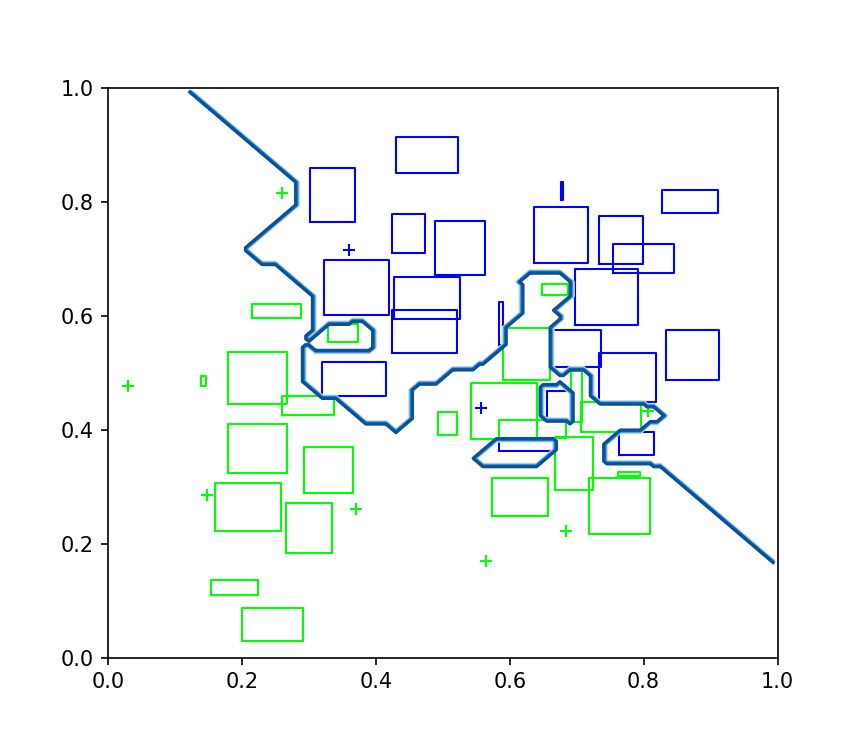

In [13]:
onln_gfmm_clf_without_missing.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

#### Training a GFMMNN model on the data set WITH missing feature values

In [14]:
onln_gfmm_clf_with_missing = OnlineGFMM(theta=theta, theta_min=theta_min, gamma=gamma, is_draw=is_draw)

In [15]:
onln_gfmm_clf_with_missing.fit(Xtr_with_missing, ytr_with_missing)

OnlineGFMM(C=array([1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 1]),
           V=array([[0.42413   , 0.47106   ],
       [0.70577   , 0.397105  ],
       [0.82785   , 0.78025   ],
       [0.48794   , 0.672     ],
       [0.66038   , 0.51128   ],
       [0.29343   , 0.26124   ],
       [0.4434    , 0.53516   ],
       [0.32289   , 0.603435  ],
       [0.63683   , 0.6936    ],
       [0.03      , 0.47757   ],
       [0.54181   , 0.43986   ],
       [0.71785   , 0.21704   ],
       [0...
       [0.30005   , 0.19643   ],
       [0.67906   , 0.83605   ],
       [0.16155   , 0.28498   ],
       [0.52197   , 0.87969   ],
       [0.66037   , 0.57837   ],
       [0.49408   , 0.66846   ],
       [0.80583   , 0.43242   ],
       [0.35813   , 0.58772   ],
       [0.79935   , 0.7757    ],
       [0.79516   , 0.32629   ],
       [0.70743   , 0.50325   ],
       [0.36842   , 

In [16]:
print("Number of hyperboxes of the GFMM model trained on the data set with missing feature values = ", onln_gfmm_clf_with_missing.get_n_hyperboxes())

Number of hyperboxes of the GFMM model trained on the data set with missing feature values =  53


<IPython.core.display.Javascript object>


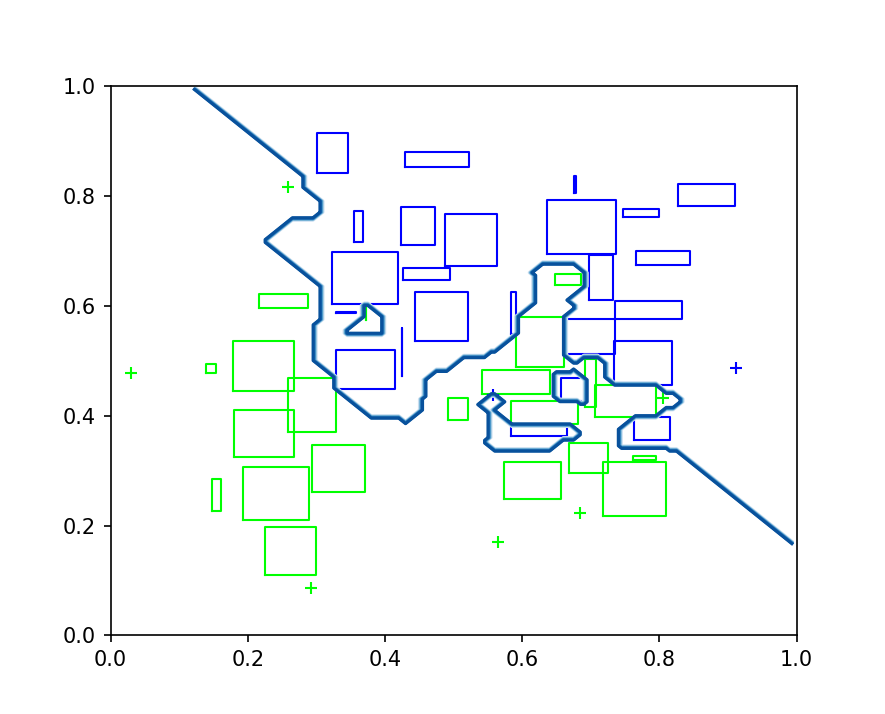

In [17]:
onln_gfmm_clf_with_missing.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

### Make prediction

In [18]:
y_pred_without_missing = onln_gfmm_clf_without_missing.predict(Xtest)
acc_without_missing = accuracy_score(ytest, y_pred_without_missing)
print(f'Accuracy of the model trained on the data set without missing values = {acc_without_missing * 100: .2f}%')

y_pred_with_missing = onln_gfmm_clf_with_missing.predict(Xtest)
acc_with_missing = accuracy_score(ytest, y_pred_with_missing)
print(f'Accuracy of the model trained on the data set with missing values = {acc_with_missing * 100: .2f}%')

Accuracy of the model trained on the data set without missing values =  84.50%
Accuracy of the model trained on the data set with missing values =  84.10%


#### Using membership value to show the prediction for the testing data with missing features values

In [19]:
Xtest_with_missing = np.array([[0.1, np.nan],
                               [np.nan, 0.5]])
onln_gfmm_clf_with_missing.predict_with_membership(Xtest_with_missing)

array([[0.79877, 0.96097],
       [1.     , 1.     ]])

From the illustration of resulting hyperboxes, we can see that for input sample X=[0.1,_ ], there is no blue (class 1) hyperboxes surrounding the vertical line x = 0.1 and the distance from the green (class 2) hyperboxes to this vertical line (x = 0.1) is shorter than the distance from the blue (class 1) hyperboxes to this line. Therefore, the membership value of class 2 (0.96097) is higher than the membership value of class 1 (0.79877) in this case. For input sample X = [_, 0.5], we can see that there are both green hyperboxes and blue hyperboxes crossing out the horizontal line (y = 0.5). Therefore, the membership values for both classes in this case are 1.

## 2. Improved online learning algorithm (IOL-GFMM) for General Fuzzy Min-Max Neural Network

In [20]:
from hbbrain.numerical_data.incremental_learner.iol_gfmm import ImprovedOnlineGFMM

In [21]:
# Initialise parameters
theta=0.1
gamma=1
is_draw=False

#### Training a GFMMNN model on the data set without missing feature values

In [22]:
iol_gfmm_clf_without_missing = ImprovedOnlineGFMM(theta=theta, gamma=gamma, is_draw=is_draw)

In [23]:
iol_gfmm_clf_without_missing.fit(Xtr_without_missing, ytr_without_missing)

ImprovedOnlineGFMM(C=array([1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2]),
                   N_samples=array([11,  3,  2, 10,  5,  6,  6,  2,  7,  6,  3,  1,  7,  6,  2, 11,  1,
        5,  7,  2,  3,  9,  3,  4,  6,  9, 10,  5,  8, 13,  4,  4,  3,  3,
        6,  4,  2,  1,  2,  1,  1,  1,  2,  1,  2,  1,  1,  2,  1,  1,  1,
        5,  2,  1,  1,  6,  1,  5,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
                   V=array([[0.42413, 0.5351...
       [0.52621 , 0.59493 ],
       [0.79935 , 0.7757  ],
       [0.6248  , 0.39922 ],
       [0.79516 , 0.32629 ],
       [0.66562 , 0.36352 ],
       [0.36057 , 0.71561 ],
       [0.72496 , 0.38674 ],
       [0.70743 , 0.50325 ],
       [0.40233 , 0.67232 ],
       [0.28822 , 0.62174 ],
       [0.14737 , 0.28498 ],
       [0.75421 , 0.40498 ],
       [0.59655 , 

In [24]:
print("Number of hyperboxes of the GFMM model trained on the data set without missing feature values = ", iol_gfmm_clf_without_missing.get_n_hyperboxes())

Number of hyperboxes of the GFMM model trained on the data set without missing feature values =  68


<IPython.core.display.Javascript object>


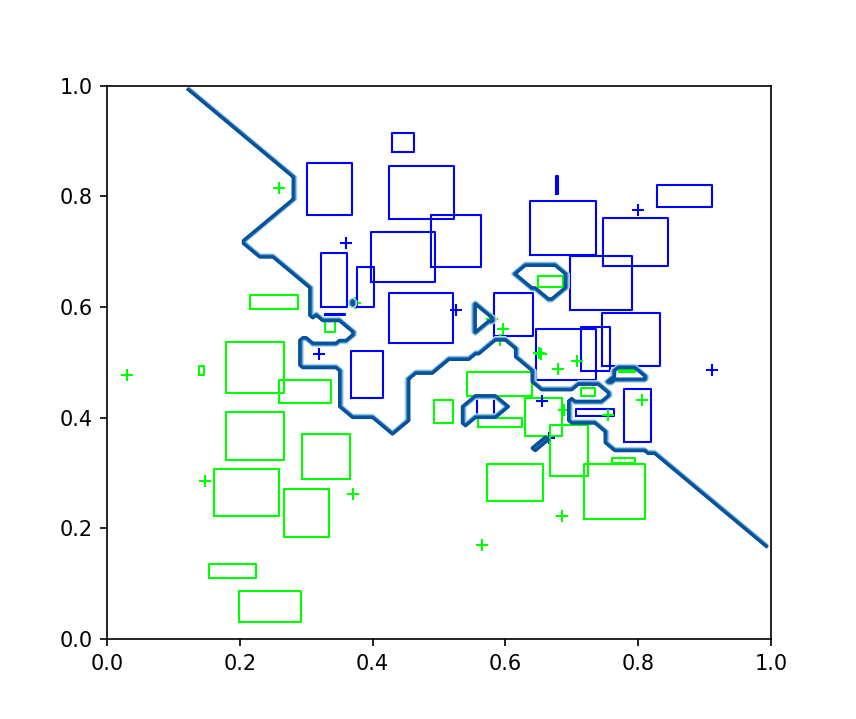

In [25]:
iol_gfmm_clf_without_missing.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

#### Training a GFMMNN model on the data set WITH missing feature values

In [26]:
iol_gfmm_clf_with_missing = ImprovedOnlineGFMM(theta=theta, gamma=gamma, is_draw=is_draw)

In [27]:
iol_gfmm_clf_with_missing.fit(Xtr_with_missing, ytr_with_missing)

ImprovedOnlineGFMM(C=array([1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2]),
                   N_samples=array([ 4,  3,  2,  6,  8, 10,  8,  7,  6,  1,  9,  6,  2,  3,  5,  7,  2,
        3,  7,  3,  4,  9,  9, 10,  7,  7, 11,  4,  3,  5,  4,  6,  1, 12,
        1,  3,  2,  4,  1,  3,  4,  2,  1,  1,  1,  1,  2,  3,  2,  1,  3,
        5,  1,  3,  3,  1,  2,  1,  1,  1,  1,  1,  1]),
                   V=array([[0.39868 , 0.47106 ],
       [0.77074 , 0.48234 ],...
       [0.65327 , 0.51585 ],
       [0.57962 , 0.57837 ],
       [0.79935 , 0.7757  ],
       [0.6248  , 0.39922 ],
       [0.79516 , 0.32629 ],
       [0.66562 , 0.36352 ],
       [0.36842 , 0.77238 ],
       [0.72496 , 0.34978 ],
       [0.70743 , 0.50325 ],
       [0.28822 , 0.62174 ],
       [0.38312 , 0.67232 ],
       [0.75421 , 0.40498 ],
       [0.59655 , 0.56029 

In [28]:
print("Number of hyperboxes of the GFMM model trained on the data set with missing feature values = ", iol_gfmm_clf_with_missing.get_n_hyperboxes())

Number of hyperboxes of the GFMM model trained on the data set with missing feature values =  63


<IPython.core.display.Javascript object>


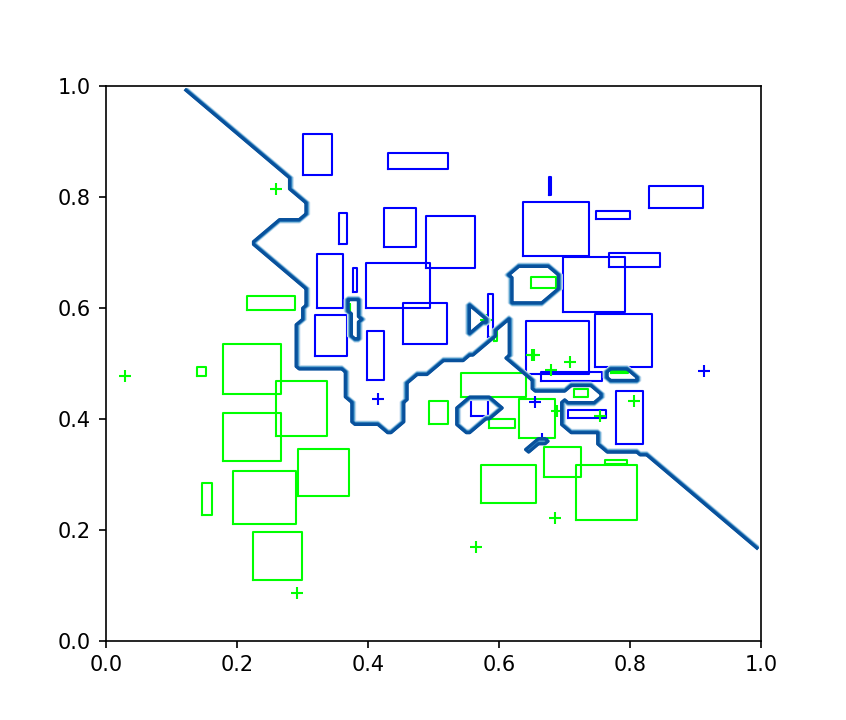

In [29]:
iol_gfmm_clf_with_missing.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

#### Make prediction

In [30]:
y_pred_without_missing_iol = iol_gfmm_clf_without_missing.predict(Xtest)
acc_without_missing = accuracy_score(ytest, y_pred_without_missing_iol)
print(f'Accuracy of the model trained on the data set without missing values = {acc_without_missing * 100: .2f}%')

y_pred_with_missing_iol = iol_gfmm_clf_with_missing.predict(Xtest)
acc_with_missing = accuracy_score(ytest, y_pred_with_missing_iol)
print(f'Accuracy of the model trained on the data set with missing values = {acc_with_missing * 100: .2f}%')

Accuracy of the model trained on the data set without missing values =  87.20%
Accuracy of the model trained on the data set with missing values =  86.70%


#### Using membership value to show the prediction for the testing data with missing features values

In [31]:
Xtest_with_missing = np.array([[0.1, np.nan],
                               [np.nan, 0.5]])
iol_gfmm_clf_with_missing.predict_with_membership(Xtest_with_missing)

array([[0.79877, 0.96097],
       [1.     , 1.     ]])

The results and explanation are similar to the case for the original online learning algorithm

## 3. Accelerated agglomerative learning algorithm (AGGLO-2) for General Fuzzy Min-Max Neural Network

In [32]:
from hbbrain.numerical_data.batch_learner.accel_agglo_gfmm import AccelAgglomerativeLearningGFMM

In [33]:
# Initialise parameters for the accelerated agglomerative learning algorithm
theta = 0.1
gamma = 1
min_simil = 0
simil_measure = 'mid'
is_draw = False

#### Training a GFMMNN model on the data set without missing feature values

In [34]:
agglo2_gfmm_clf_without_missing = AccelAgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)

In [35]:
agglo2_gfmm_clf_without_missing.fit(Xtr_without_missing, ytr_without_missing)

AccelAgglomerativeLearningGFMM(min_simil=0, theta=0.1)

In [36]:
print("Number of hyperboxes of the GFMM model trained on the data set without missing feature values = ", agglo2_gfmm_clf_without_missing.get_n_hyperboxes())

Number of hyperboxes of the GFMM model trained on the data set without missing feature values =  62


<IPython.core.display.Javascript object>


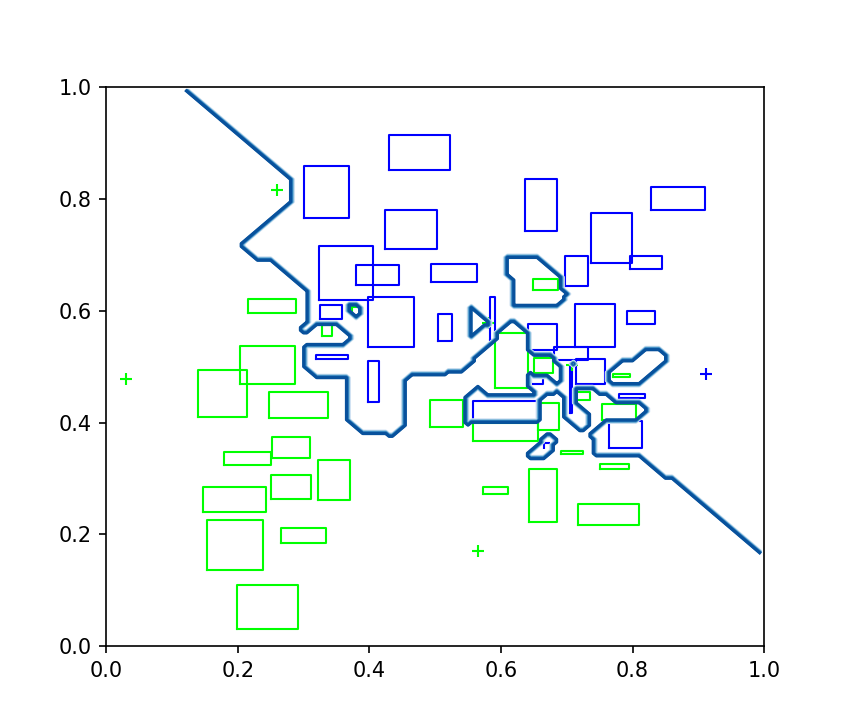

In [37]:
agglo2_gfmm_clf_without_missing.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

#### Training a GFMMNN model on the data set WITH missing feature values

In [38]:
agglo2_gfmm_clf_with_missing = AccelAgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)

In [39]:
agglo2_gfmm_clf_with_missing.fit(Xtr_with_missing, ytr_with_missing)

AccelAgglomerativeLearningGFMM(min_simil=0, theta=0.1)

In [40]:
print("Number of hyperboxes of the GFMM model trained on the data set with missing feature values = ", agglo2_gfmm_clf_with_missing.get_n_hyperboxes())

Number of hyperboxes of the GFMM model trained on the data set with missing feature values =  61


<IPython.core.display.Javascript object>


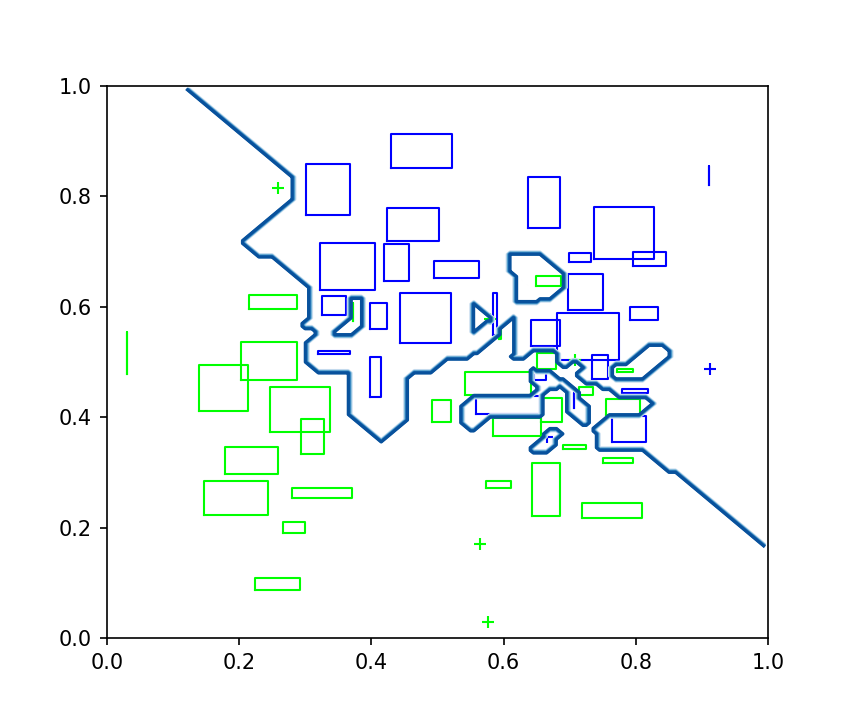

In [41]:
agglo2_gfmm_clf_with_missing.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

#### Make prediction

In [42]:
y_pred_without_missing_agglo2 = agglo2_gfmm_clf_without_missing.predict(Xtest)
acc_without_missing = accuracy_score(ytest, y_pred_without_missing_agglo2)
print(f'Accuracy of the model trained on the data set without missing values = {acc_without_missing * 100: .2f}%')

y_pred_with_missing_agglo2 = agglo2_gfmm_clf_with_missing.predict(Xtest)
acc_with_missing = accuracy_score(ytest, y_pred_with_missing_agglo2)
print(f'Accuracy of the model trained on the data set with missing values = {acc_with_missing * 100: .2f}%')

Accuracy of the model trained on the data set without missing values =  85.00%
Accuracy of the model trained on the data set with missing values =  85.20%


#### Using membership value to show the prediction for the testing data with missing features values

In [43]:
Xtest_with_missing = np.array([[0.1, np.nan],
                               [np.nan, 0.5]])
agglo2_gfmm_clf_with_missing.predict_with_membership(Xtest_with_missing)

array([[0.79877, 0.96097],
       [1.     , 1.     ]])

## 4. Agglomerative learning algorithm with full similarity matrix (AGGLO-SM) for General Fuzzy Min-Max Neural Network

In [44]:
from hbbrain.numerical_data.batch_learner.agglo_gfmm import AgglomerativeLearningGFMM

In [45]:
# Initialise parameters for the accelerated agglomerative learning algorithm
theta = 0.1
gamma = 1
min_simil = 0
simil_measure = 'mid'
is_draw = False

#### Training a GFMMNN model on the data set without missing feature values

In [46]:
agglosm_gfmm_clf_without_missing = AgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)

In [47]:
agglosm_gfmm_clf_without_missing.fit(Xtr_without_missing, ytr_without_missing)

AgglomerativeLearningGFMM(min_simil=0, theta=0.1)

In [48]:
print("Number of hyperboxes of the GFMM model trained on the data set without missing feature values = ", agglosm_gfmm_clf_without_missing.get_n_hyperboxes())

Number of hyperboxes of the GFMM model trained on the data set without missing feature values =  62


<IPython.core.display.Javascript object>


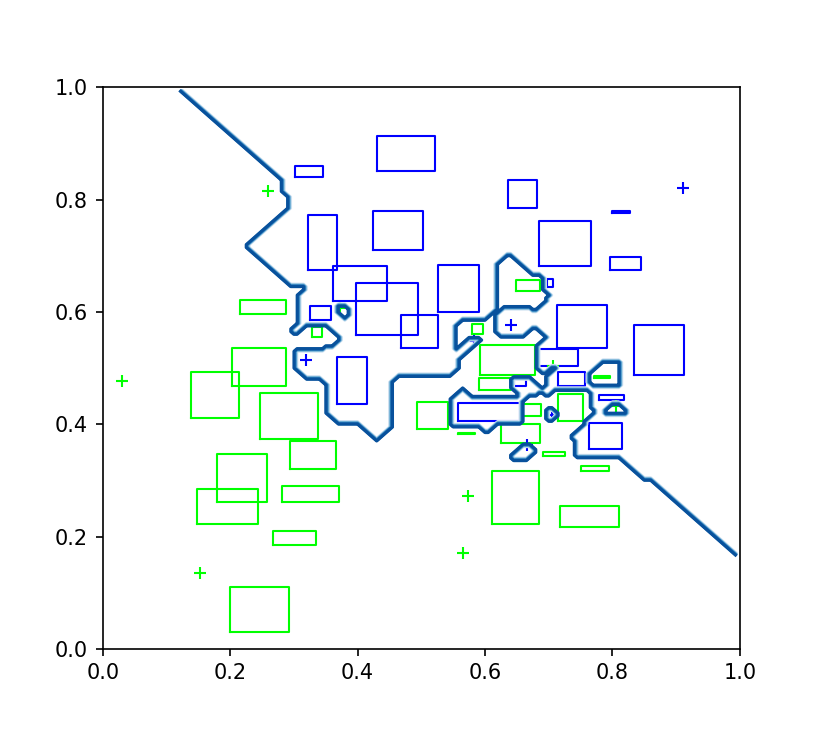

In [49]:
agglosm_gfmm_clf_without_missing.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

#### Training a GFMMNN model on the data set WITH missing feature values

In [50]:
agglosm_gfmm_clf_with_missing = AgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)

In [51]:
agglosm_gfmm_clf_with_missing.fit(Xtr_with_missing, ytr_with_missing)

AgglomerativeLearningGFMM(min_simil=0, theta=0.1)

In [52]:
print("Number of hyperboxes of the GFMM model trained on the data set WITH missing feature values = ", agglosm_gfmm_clf_with_missing.get_n_hyperboxes())

Number of hyperboxes of the GFMM model trained on the data set WITH missing feature values =  60


<IPython.core.display.Javascript object>


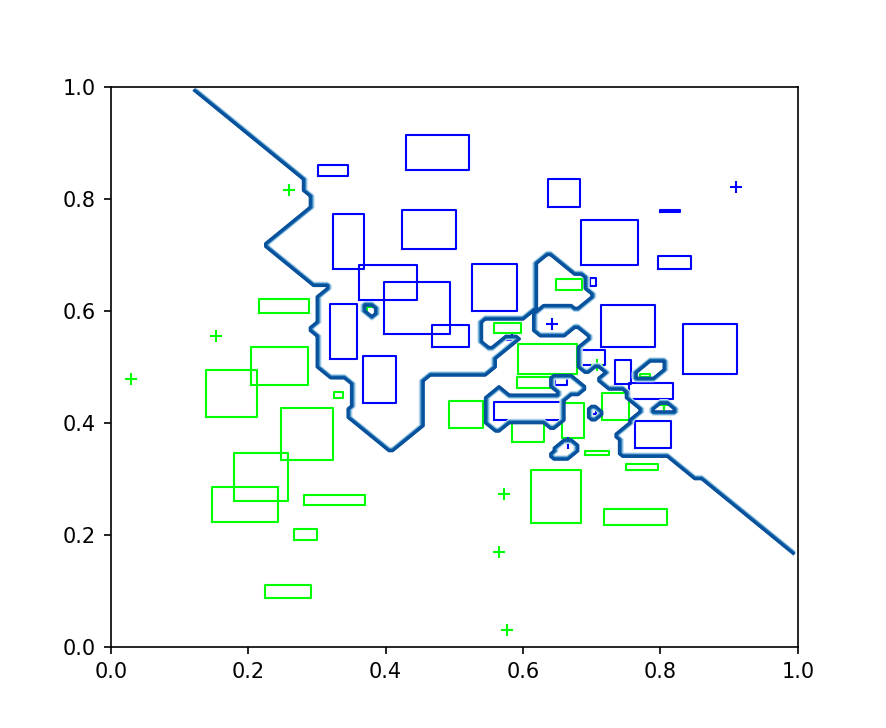

In [53]:
agglosm_gfmm_clf_with_missing.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

#### Make prediction 

In [54]:
y_pred_without_missing_agglosm = agglosm_gfmm_clf_without_missing.predict(Xtest)
acc_without_missing = accuracy_score(ytest, y_pred_without_missing_agglosm)
print(f'Accuracy of the model trained on the data set without missing values = {acc_without_missing * 100: .2f}%')

y_pred_with_missing_agglosm = agglosm_gfmm_clf_with_missing.predict(Xtest)
acc_with_missing = accuracy_score(ytest, y_pred_with_missing_agglosm)
print(f'Accuracy of the model trained on the data set with missing values = {acc_with_missing * 100: .2f}%')

Accuracy of the model trained on the data set without missing values =  85.20%
Accuracy of the model trained on the data set with missing values =  84.40%


#### Using membership value to show the prediction for the testing data with missing features values

In [55]:
Xtest_with_missing = np.array([[0.1, np.nan],
                               [np.nan, 0.5]])
agglosm_gfmm_clf_with_missing.predict_with_membership(Xtest_with_missing)

array([[0.79877, 0.96097],
       [1.     , 1.     ]])